In [91]:
import tensorflow as tf
keras = tf.keras
from keras import Sequential, Input
from keras.layers import Dense
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [92]:
train_df = pd.read_csv("train.csv")
full_test_df = pd.read_csv("test.csv")
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [93]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [94]:
train_df.dropna(inplace=True)
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [95]:
train_df.drop(["PassengerId", "Name"], axis=1, inplace=True)
test_df = full_test_df.drop(["PassengerId", "Name"], axis=1)
train_df.head(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False


In [96]:
le = LabelEncoder()

for i in train_df.columns:
    modified = le.fit_transform(train_df[i])
    train_df[i] = modified

train_df.head(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,137,2,39,0,0,0,0,0,0,0
1,0,0,1823,2,24,0,107,9,25,424,44,1
2,1,0,1,2,58,1,43,1044,0,1101,49,0


In [97]:
for i in test_df.columns:
    modified = le.fit_transform(test_df[i])
    test_df[i] = modified

test_df.head(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,2784,2,27,0,0,0,0,0,0
1,0,0,1867,2,19,0,0,9,0,724,0
2,1,1,257,0,31,0,0,0,0,0,0


In [99]:
X_train = train_df.drop(["Transported"], axis=1)
y_train = train_df["Transported"]

In [100]:
model = Sequential([
    Input(X_train.shape[1]),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid"),
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               1536      
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (46.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [102]:
X_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,137,2,39,0,0,0,0,0,0
1,0,0,1823,2,24,0,107,9,25,424,44
2,1,0,1,2,58,1,43,1044,0,1101,49
3,1,0,1,2,33,0,0,723,311,996,180
4,0,0,1825,2,16,0,257,69,144,437,2
...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,134,0,41,1,0,1195,0,827,74
8689,0,1,4293,1,18,0,0,0,0,0,0
8690,0,0,4298,2,26,0,0,0,864,1,0
8691,1,0,1778,0,32,0,0,664,0,305,958


In [103]:
hist = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, shuffle=True)

Epoch 1/50
186/186 [==============================] - 3s 10ms/step - loss: 3.4911 - accuracy: 0.6720 - val_loss: 3.8178 - val_accuracy: 0.5779
Epoch 2/50
186/186 [==============================] - 2s 10ms/step - loss: 1.8710 - accuracy: 0.6979 - val_loss: 0.7620 - val_accuracy: 0.7700
Epoch 3/50
186/186 [==============================] - 2s 10ms/step - loss: 1.2582 - accuracy: 0.7312 - val_loss: 1.1244 - val_accuracy: 0.6641
Epoch 4/50
186/186 [==============================] - 2s 9ms/step - loss: 0.8976 - accuracy: 0.7331 - val_loss: 0.7122 - val_accuracy: 0.7398
Epoch 5/50
186/186 [==============================] - 2s 9ms/step - loss: 0.8903 - accuracy: 0.7309 - val_loss: 0.9580 - val_accuracy: 0.6626
Epoch 6/50
186/186 [==============================] - 2s 9ms/step - loss: 0.8982 - accuracy: 0.7290 - val_loss: 0.6272 - val_accuracy: 0.7655
Epoch 7/50
186/186 [==============================] - 2s 9ms/step - loss: 0.6410 - accuracy: 0.7495 - val_loss: 0.5384 - val_accuracy: 0.7746
Epo

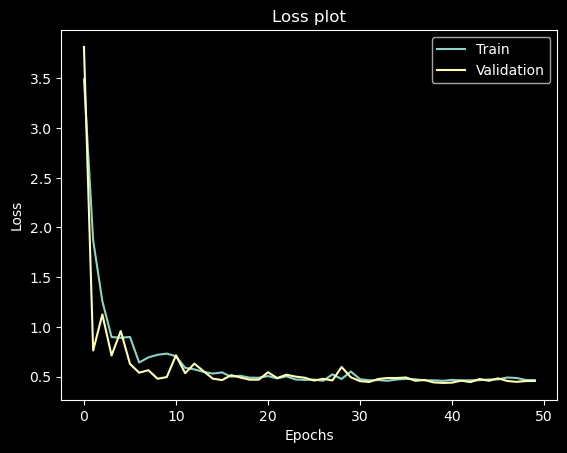

In [104]:
plt.plot(range(50), hist.history["loss"], label="Train")
plt.plot(range(50), hist.history["val_loss"], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss plot")
plt.legend()

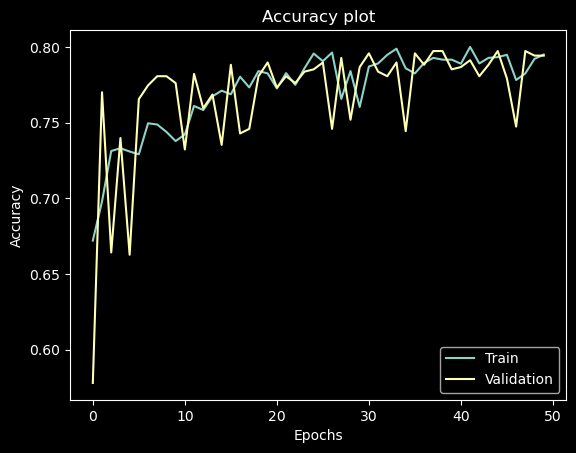

In [105]:
plt.plot(range(50), hist.history["accuracy"], label="Train")
plt.plot(range(50), hist.history["val_accuracy"], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy plot")
plt.legend()

In [106]:
y_pred = model.predict(test_df)

134/134 [==============================] - 0s 3ms/step


In [107]:
labels = np.where(y_pred > 0.5, True, False)
labels

array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [108]:
res = pd.DataFrame({"PassengerId": full_test_df["PassengerId"], "Transported": labels.flatten()})
res

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [109]:
res.to_csv("./submission.csv", index=False)

In [111]:
model.save("./model.keras")